In [1]:
import numpy as np
import matplotlib.pylab as plt
import ot
from utils import simulate_dataset, format_dataset
from repairs import DI_list_geometric_repair, DI_list_random_repair, geometric_repair
from sklearn.manifold import TSNE

In [2]:
# Parameters for the simulation
n0 = 600
n1 = 400
# mu0 = (3, 3, 2, 2.5, 3.5)
# mu1 = (4, 4, 3, 3.5, 4.5)
# sigma = np.diag([1, 1, 0.5, 0.5, 1])
# beta0 = (1, -1, -0.5, 1, -1)
# beta1 = (1, -0.4, 1, -1, 1)

mu0 = (3, 3)
mu1 = (4, 4)
sigma = np.diag([1, 1])
beta0 = (1, -1)
beta1 = (1, -0.6)
 
# Simulate the dataset
X0, X1, Y0, Y1 = simulate_dataset(n0, n1, mu0, mu1, sigma, beta0, beta1)
X0.shape, X1.shape, Y0.shape, Y1.shape

((600, 2), (400, 2), (600,), (400,))

In [3]:
# We visualize each distributions projecting each of the 5d 
# multivariate source conditional datasets to 2d representation, using the TSNE algorithm

X,Y = format_dataset(X0, X1, Y0, Y1)

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(X[:,1:])
X_embedded = np.concatenate([X[:,:1], X_embedded], axis=1)
X_embedded.shape

(1000, 3)

In [4]:
# X,Y = format_dataset(X0, X1, Y0, Y1)
# print(X.shape, Y.shape)
# plt.figure(1, (5, 5))
# plt.plot(X_embedded[X_embedded[:,0] == 0][:, 1], X_embedded[X_embedded[:,0] == 0][:, 2], '+')
# plt.plot(X_embedded[X_embedded[:,0] == 1][:, 1], X_embedded[X_embedded[:,0] == 1][:, 2], 'x')
# plt.show()

In [5]:
Ae, be = ot.da.OT_mapping_linear(X0, X1)
print(X0.shape)
print(X1.shape)
print(type(X0))
print(type(X1))

lbd = 0.5

X01 = X0.dot(Ae) + be
X01 = lbd*X01+(1-lbd)*X0
print(X01.shape)


X02 = X1.dot(Ae) + be
X02 = lbd*X02+(1-lbd)*X1
print(X02.shape)


(600, 2)
(400, 2)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(600, 2)
(400, 2)


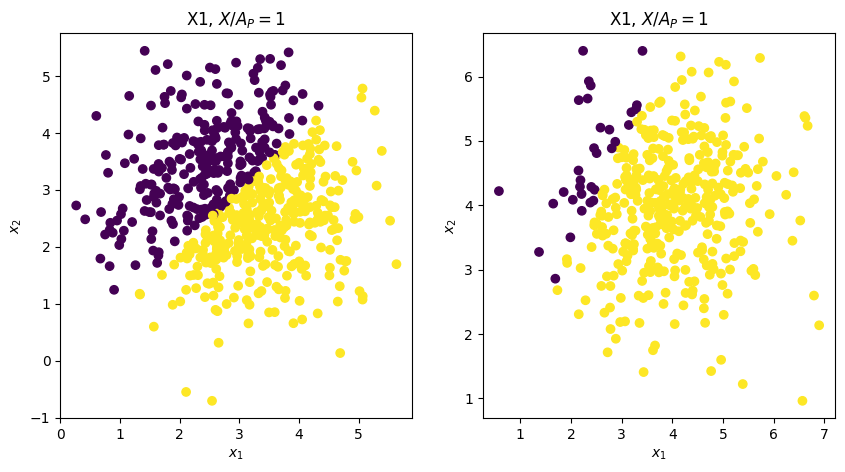

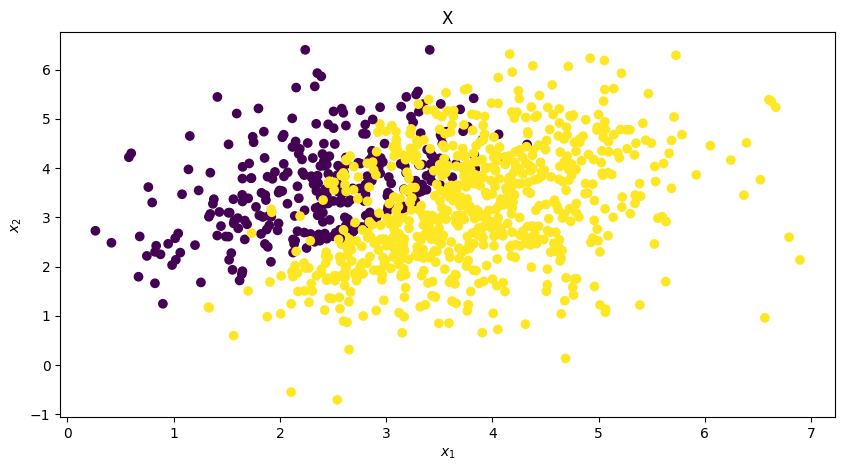

In [16]:
X,Y = format_dataset(X0, X1, Y0, Y1)
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X0[:,0], X0[:,1], c=Y0)
plt.title(r'X1, $X/A_P=1$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.subplot(122)

plt.scatter(X1[:,0], X1[:,1], c=Y1)
plt.title(r'X1, $X/A_P=1$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

#plot X, Y
X,Y = format_dataset(X0, X1, Y0, Y1)

fig = plt.figure(figsize=(10, 5))
plt.scatter(X[:,1], X[:,2], c=Y)
plt.title(r'X')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()







In [7]:
DIs, X0r, X1r, y0r, y1r=DI_list_geometric_repair(X0,X1, beta0,beta1)

TypeError: DI_list_geometric_repair() missing 1 required positional argument: 'iter'

In [ ]:
#lamba is the weight of the repaired data

plt.plot(np.linspace(0,1,len(res)), res)
plt.title('Geometric repair')
plt.xlabel('Lambda')
plt.ylabel('Disparate impact')
plt.legend()
plt.show()

NameError: name 'res' is not defined